In [1]:
from mpl_toolkits import mplot3d
import functions as fn
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = '../data/uf20-91/uf20-01.cnf'
infinite=2**31
num_vars, clauses = fn.read_problem(filename)
set_vars = [infinite]*num_vars
pop_size = 1000

<IPython.core.display.Javascript object>


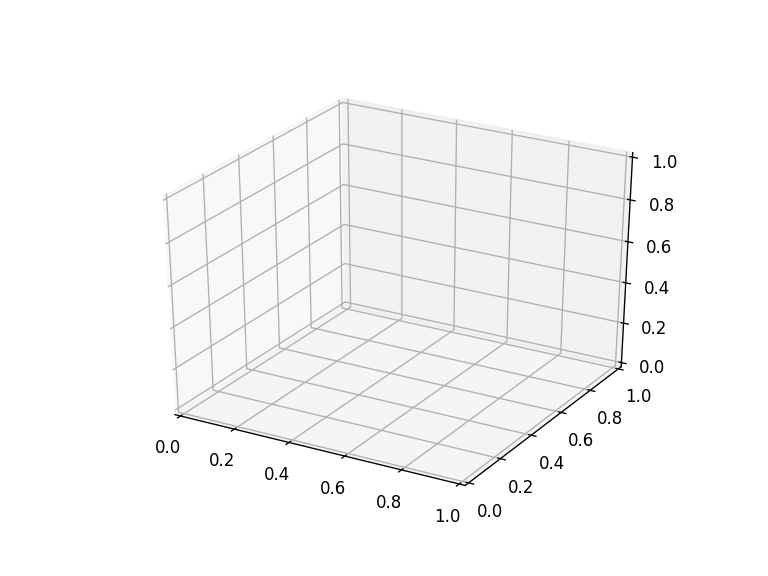

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [4]:
clauses = [[-1,-2,-3],[-2,-3,-4],[1,4],[4],[-1]]
x, y, z = [],[],[]
for i in range(4):
    for j in range(4):
        indiv = [int(l) for l in f'{i:02b}{j:02b}']
        print (f'Indiv: {indiv}, ({i},{j}), f({fn.maxsat_fitness(clauses, indiv)})')
        z += [fn.maxsat_fitness(clauses, indiv)]
        x += [i]
        y += [j]

Indiv: [0, 0, 0, 0], (0,0), f(3)
Indiv: [0, 0, 0, 1], (0,1), f(5)
Indiv: [0, 0, 1, 0], (0,2), f(3)
Indiv: [0, 0, 1, 1], (0,3), f(5)
Indiv: [0, 1, 0, 0], (1,0), f(3)
Indiv: [0, 1, 0, 1], (1,1), f(5)
Indiv: [0, 1, 1, 0], (1,2), f(3)
Indiv: [0, 1, 1, 1], (1,3), f(4)
Indiv: [1, 0, 0, 0], (2,0), f(3)
Indiv: [1, 0, 0, 1], (2,1), f(4)
Indiv: [1, 0, 1, 0], (2,2), f(3)
Indiv: [1, 0, 1, 1], (2,3), f(4)
Indiv: [1, 1, 0, 0], (3,0), f(3)
Indiv: [1, 1, 0, 1], (3,1), f(4)
Indiv: [1, 1, 1, 0], (3,2), f(2)
Indiv: [1, 1, 1, 1], (3,3), f(2)


<IPython.core.display.Javascript object>


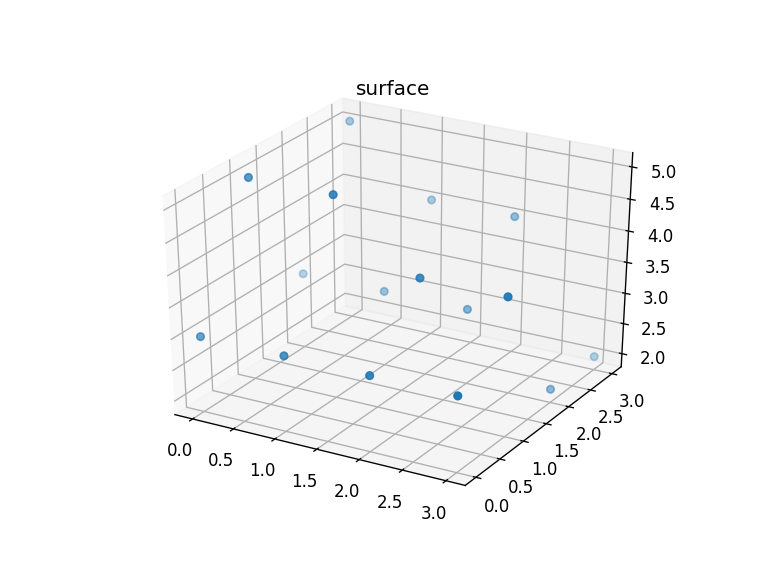

Text(0.5, 0.92, 'surface')

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)
ax.set_title('surface')

In [8]:
# Binary Number Range Initial population
x,y,z = [],[],[]
total_num = 2**num_vars
ctr = 0
while ctr < int(total_num/pop_size)*pop_size:
    bin_i = f'{ctr:020b}'
    indiv = [int(l) for l in bin_i]
    z += [fn.maxsat_fitness(clauses, indiv)]
    x += [int(bin_i[:10], base=2)]
    y += [int(bin_i[10:], base=2)]
    ctr += int(total_num/pop_size)
    
print(len(z))

1000


<IPython.core.display.Javascript object>


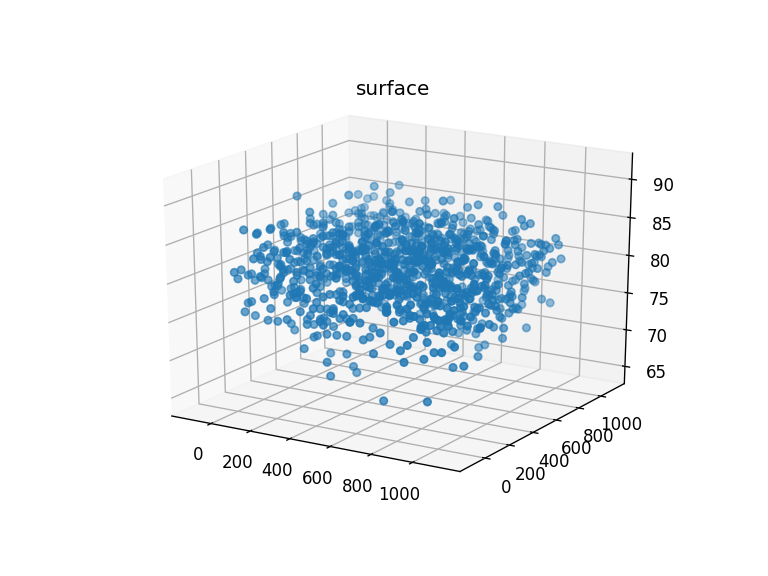

Text(0.5, 0.92, 'surface')

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)
ax.set_title('Binary range')

In [16]:
# Random initial population
x,y,z = [],[],[]
initial_pop = fn.random_population(num_vars, set_vars, pop_size)
for indiv in initial_pop:
    str_indiv = "".join(str(i) for i in indiv)
    z += [fn.maxsat_fitness(clauses, indiv)]
    x += [int(str_indiv[:10], base=2)]
    y += [int(str_indiv[10:], base=2)]
    
print(len(z))

1000


<IPython.core.display.Javascript object>


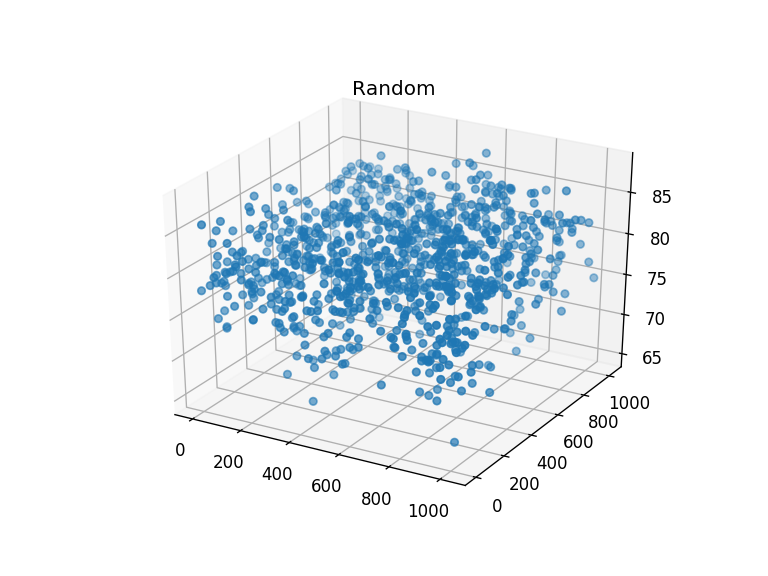

Text(0.5, 0.92, 'Random')

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x,y,z)
ax.set_title('Random')